In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

C:\Users\1000 MEEZA\AppData\Local\Temp\ipykernel_7080\3970977394.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('healthcare_dataset.csv')

In [3]:
# تحويل عمود 'Date of Admission' و 'Discharge Date' إلى صيغة تاريخية
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# حساب عدد الأيام التي قضاها المريض في المستشفى
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# بعد ذلك يمكنك تقسيم التواريخ إلى مكونات اليوم، الشهر، والسنة إذا كنت بحاجة لذلك
df['Admission Day'] = df['Date of Admission'].dt.day
df['Admission Month'] = df['Date of Admission'].dt.month
df['Admission Year'] = df['Date of Admission'].dt.year

df['Discharge Day'] = df['Discharge Date'].dt.day
df['Discharge Month'] = df['Discharge Date'].dt.month
df['Discharge Year'] = df['Discharge Date'].dt.year

# يمكنك بعد ذلك حذف التواريخ الأصلية إذا لم تكن بحاجة إليها
df = df.drop(columns=['Date of Admission', 'Discharge Date'])

# عرض أول بضعة أسطر للتحقق من النتائج
df[['Admission Day', 'Admission Month', 'Admission Year', 'Discharge Day', 'Discharge Month', 'Discharge Year', 'Length of Stay']].head()


,Admission Day,Admission Month,Admission Year,Discharge Day,Discharge Month,Discharge Year,Length of Stay
0,31,1,2024,2,2,2024,2
1,20,8,2019,26,8,2019,6
2,22,9,2022,7,10,2022,15
3,18,11,2020,18,12,2020,30
4,19,9,2022,9,10,2022,20


In [4]:
from sklearn.preprocessing import LabelEncoder

Gender_label_encoder = LabelEncoder()
Gender_label_encoder.fit(['Male', 'Female'])
df["Gender"] = Gender_label_encoder.transform(df["Gender"])

from sklearn.preprocessing import LabelEncoder
df["Blood Type"] = LabelEncoder().fit_transform(df["Blood Type"])

from sklearn.preprocessing import LabelEncoder
df["Medical Condition"] = LabelEncoder().fit_transform(df["Medical Condition"])

from sklearn.preprocessing import LabelEncoder
df["Insurance Provider"] = LabelEncoder().fit_transform(df["Insurance Provider"])

from sklearn.preprocessing import LabelEncoder
df["Admission Type"] = LabelEncoder().fit_transform(df["Admission Type"])

from sklearn.preprocessing import LabelEncoder
df["Medication"] = LabelEncoder().fit_transform(df["Medication"])

from sklearn.preprocessing import LabelEncoder
df["Test Results"] = LabelEncoder().fit_transform(df["Test Results"])



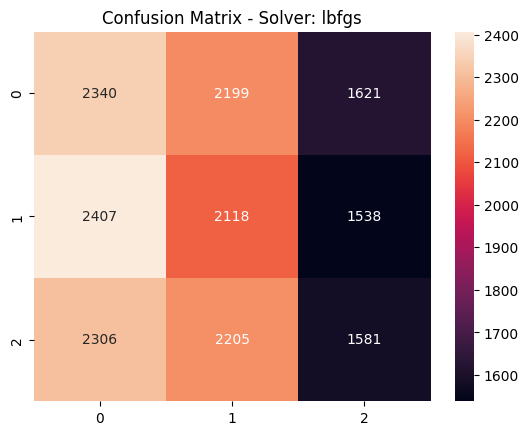

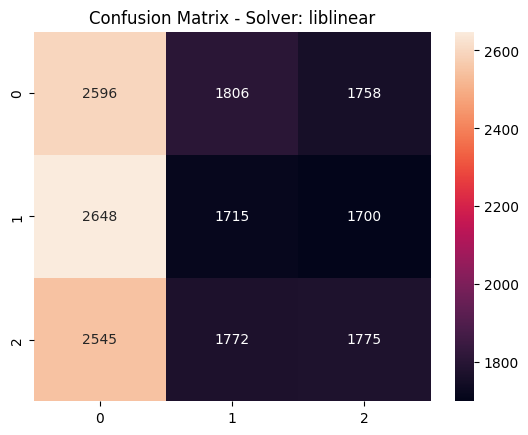

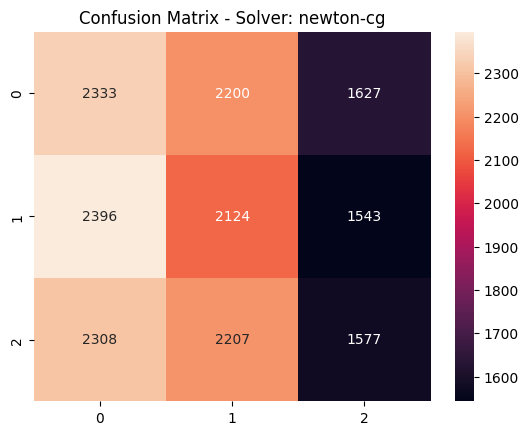

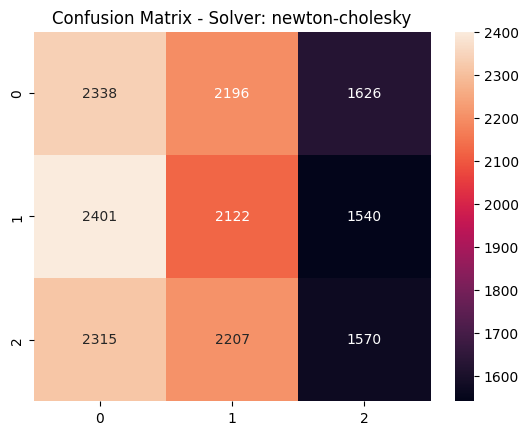

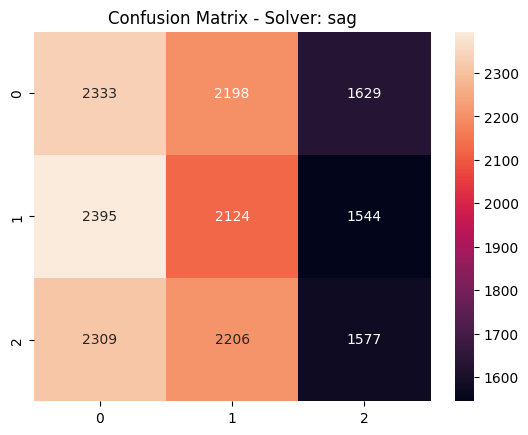

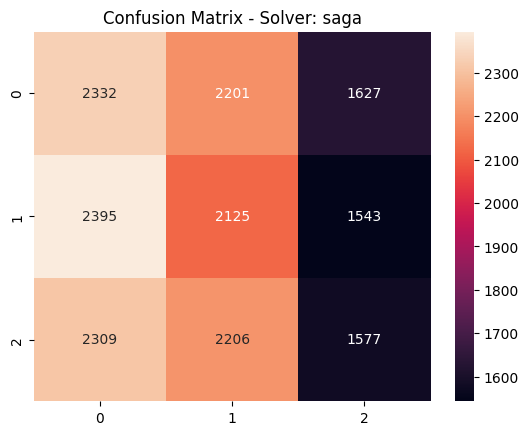

Solver: lbfgs
              precision    recall  f1-score   support

           0       0.33      0.38      0.35      6160
           1       0.32      0.35      0.34      6063
           2       0.33      0.26      0.29      6092

    accuracy                           0.33     18315
   macro avg       0.33      0.33      0.33     18315
weighted avg       0.33      0.33      0.33     18315

Solver: liblinear
              precision    recall  f1-score   support

           0       0.33      0.42      0.37      6160
           1       0.32      0.28      0.30      6063
           2       0.34      0.29      0.31      6092

    accuracy                           0.33     18315
   macro avg       0.33      0.33      0.33     18315
weighted avg       0.33      0.33      0.33     18315

Solver: newton-cg
              precision    recall  f1-score   support

           0       0.33      0.38      0.35      6160
           1       0.33      0.35      0.34      6063
           2       0.33  

In [5]:
#cdf = df [['Age','Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results', 'Billing Amount','Length of Stay']]
#cdf.head()

X = df[['Medical Condition','Length of Stay','Admission Type','Age','Admission Day','Admission Month','Admission Year','Discharge Day','Discharge Month','Discharge Year']].to_numpy()
y = df["Test Results"].to_numpy()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Define the solvers
solvers = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

results = {}

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for solver in solvers:
    LR_model = LogisticRegression(solver=solver, class_weight='balanced', max_iter=1000, C=1.0)
    LR_model.fit(X_train_scaled, y_train)
    predictions = LR_model.predict(X_test_scaled)
    predictions_probability = LR_model.predict_proba(X_test_scaled)
    cf_matrix = confusion_matrix(y_test, predictions)

    results[solver] = {
        "classification_report": classification_report(y_test, predictions),
        "confusion_matrix": cf_matrix
    }

    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f")
    plt.title(f"Confusion Matrix - Solver: {solver}")
    plt.show()

# Print classification reports for each solver
for solver, result in results.items():
    print(f"Solver: {solver}")
    print(result["classification_report"])


In [6]:
import pickle
# save the model to disk
with open('model.pkl', 'wb') as model_file:
    pickle.dump(LR_model, model_file)

In [7]:
with open('model.pkl','rb') as scaler_file:
     mp = pickle.load(scaler_file)

In [8]:
mp.predict(X_test_scaled)

array([2, 2, 0, ..., 2, 2, 1])